In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid", {'axes.grid': False})

%matplotlib inline

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
# Read in the data as a pandas frame

f = pd.read_csv('ansur_2_male_public.csv', encoding='latin-1')

f

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,235,1353,312,216,1263,228,193,384,318,...,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
4078,29443,247,1473,336,234,1346,253,196,428,374,...,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
4079,29447,264,1394,313,227,1280,245,193,407,367,...,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
4080,29451,203,1417,327,223,1314,250,196,419,365,...,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand


In [3]:
# Pull out a X and Y variable to do two-dimensional PCA

X = np.array(f.balloffootcircumference.values)
Y = np.array(f.balloffootlength.values)

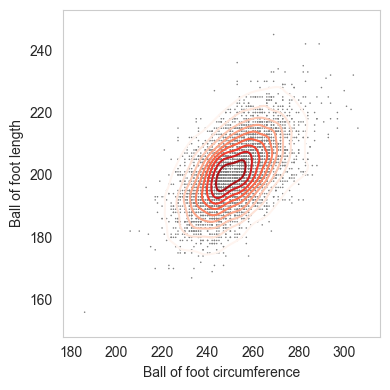

In [28]:
# Make a plot as part of EDA

plt.figure(figsize=(4, 4))

plt.scatter(X, Y, marker='.', color=[0.5, 0.5, 0.5], s=5, edgecolors="None")
sns.kdeplot(x=X, y=Y, cmap="Reds")

plt.xlabel("Ball of foot circumference")
plt.ylabel("Ball of foot length")
plt.tight_layout()

# plt.savefig('../figures/feet.pdf', format='pdf')

In [19]:
?sns.kdeplot

Signature:
sns.kdeplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    fill=None,
    multiple='layer',
    common_norm=True,
    common_grid=False,
    cumulative=False,
    bw_method='scott',
    bw_adjust=1,
    warn_singular=True,
    log_scale=None,
    levels=10,
    thresh=0.05,
    gridsize=200,
    cut=3,
    clip=None,
    legend=True,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the
distribution of observations in a dataset, analogous to a histogram. KDE
represents the data using a continuous probability density curve in one or
more dimensions.

The approach is explained further in the :ref:`user guide <tutorial_kde>`.

Relative to a histogram, KDE can produce a plot that is less cl

In [13]:
# Work with the correlation matrix

R = np.corrcoef(X, Y)
R

array([[1.        , 0.54107846],
       [0.54107846, 1.        ]])

In [14]:
# Calculate the eigensystem

la, vv = np.linalg.eigh(R)

print(la)
print(vv)

[0.45892154 1.54107846]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [15]:
# Create standardised data to visualise PCs on

Z1 = (X-np.mean(X))/np.std(X)
Z2 = (Y-np.mean(Y))/np.std(Y)

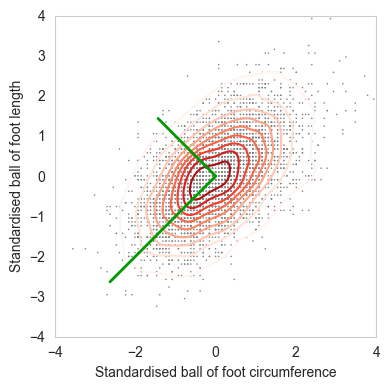

In [29]:
# Make a plot as part of EDA

plt.figure(figsize=(4, 4))

plt.scatter(Z1, Z2, marker='.', color=[0.5, 0.5, 0.5], s=5, edgecolors="None")
sns.kdeplot(x=Z1, y=Z2, cmap="Reds")
plt.plot(
    -3*np.sqrt(la[1])*np.array([0, vv[1, 0]]),  # eigen vector
    -3*np.sqrt(la[1])*np.array([0, vv[1, 1]]),  # eigen vector
    c=[0, 0.6, 0],
    linewidth=2
)
plt.plot(
    3*np.sqrt(la[0])*np.array([0, vv[0, 0]]),  # eigen vector
    3*np.sqrt(la[0])*np.array([0, vv[0, 1]]),  # eigen vector
    c=[0, 0.6, 0],
    linewidth=2
)

plt.xlabel("Standardised ball of foot circumference")
plt.ylabel("Standardised ball of foot length")
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.tight_layout()

# plt.savefig('../figures/feet_pcs.pdf', format='pdf')